In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import zipfile

# 1. Unzipping the file
with zipfile.ZipFile('/content/drive/MyDrive/Capstone/Project_A.zip', 'r') as zip_ref:
    zip_ref.extractall('Project_A')

# 2. Reading the Directory Structure
image_paths = []
labels = []

for root, dirs, files in os.walk('Project_A'):
    for file in files:
        # Assuming images are .jpg (modify this if there are other formats)
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# 3. Constructing the DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print(df.head())


                                   image_path    label
0  Project_A/Project_A/battery/battery300.jpg  battery
1  Project_A/Project_A/battery/battery682.jpg  battery
2  Project_A/Project_A/battery/battery309.jpg  battery
3  Project_A/Project_A/battery/battery847.jpg  battery
4  Project_A/Project_A/battery/battery293.jpg  battery


In [3]:
import plotly.express as px

# Prepare the data for Plotly Express
df_counts = df['label'].value_counts().reset_index()
df_counts.columns = ['Garbage Type', 'Counts']

# Create a bar chart using Plotly Express
fig = px.bar(df_counts,
             x='Garbage Type',
             y='Counts',
             title='Value Counts for Each Type of Garbage',
             labels={'Garbage Type': 'Type of Garbage', 'Counts': 'Counts'},
             color='Garbage Type',
             category_orders={"Garbage Type": df_counts['Garbage Type'].tolist()},
             text='Counts',  # Add count labels on top of the bars
             color_discrete_sequence=px.colors.qualitative.Dark2)  # Set color scheme

# Customize the layout
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_xaxes(title_text=None)  # Remove x-axis label
fig.update_yaxes(title_text=None)  # Remove y-axis label

# Show the plot
fig.show('')


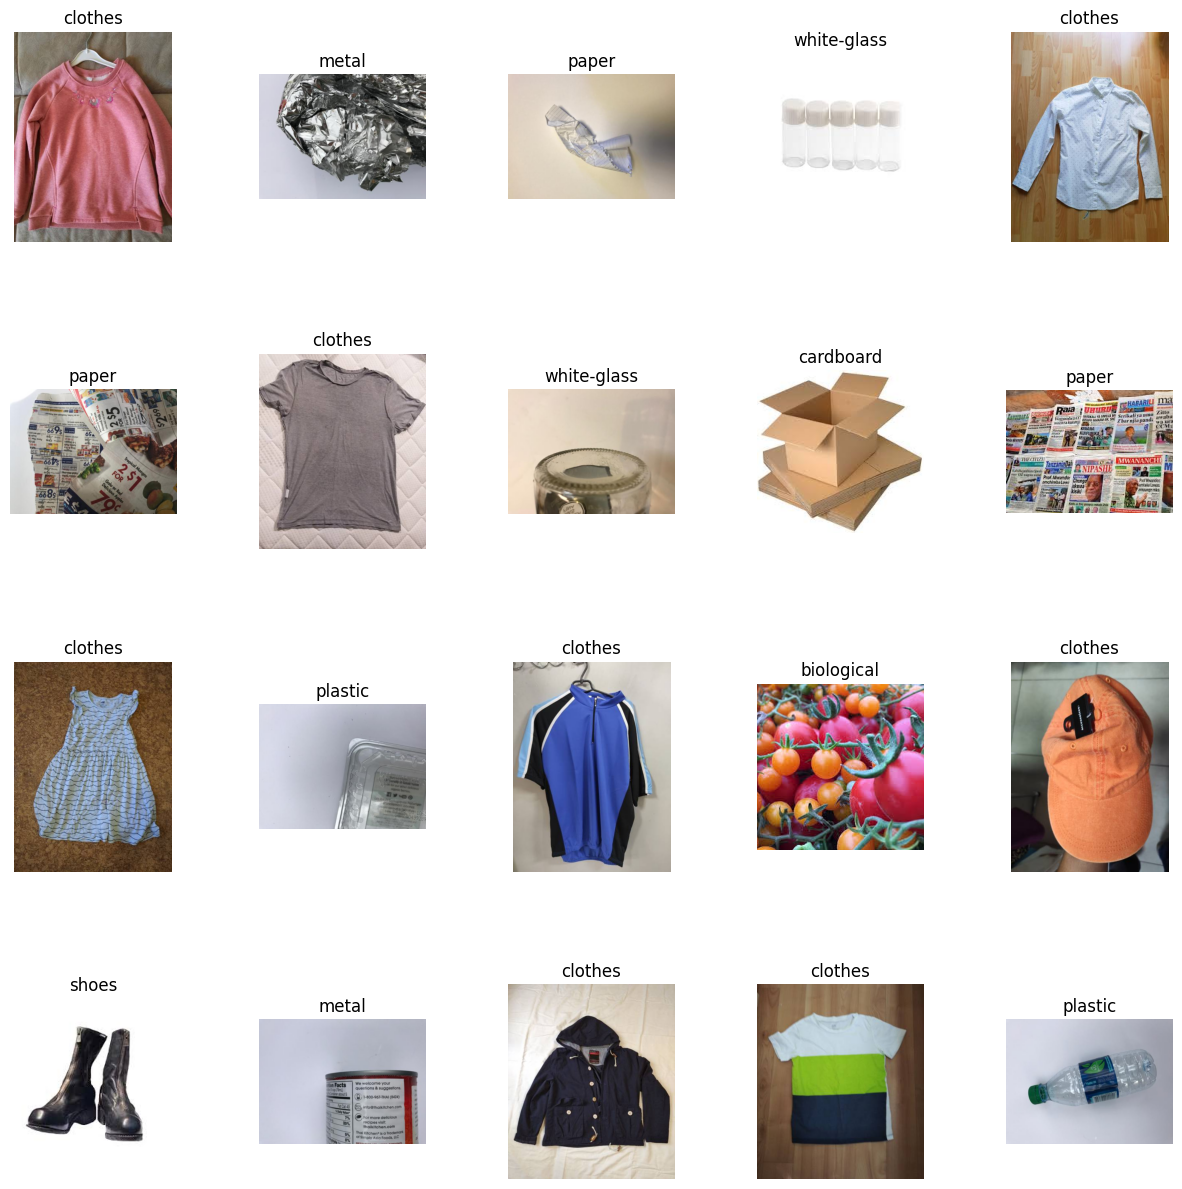

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


# 2. Reading the Directory Structure with filtering
image_paths = []
labels = []

for root, dirs, files in os.walk('Project_A'):
    for file in files:
        # Ignore macOS metadata files and ensure the file is a .jpg
        if not file.startswith("._") and file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# 3. Reconstructing the DataFrame with filtered lists
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Sampling and plotting the images (as before)
sample_df = df.sample(n=20)

# Plot the images
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(20):
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['label']

    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(label, fontsize=12)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [5]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('Project_A'):
    for file in files:
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                image_data.append({
                    'image_id': os.path.splitext(file)[0], # Assuming image_id is the file name without extension
                    'image': img,
                    'image_size': f"{width}x{height}",
                    'category': os.path.basename(root)
                })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)
df.head()


,image_id,image,image_size,category
0,battery300,<PIL.JpegImagePlugin.JpegImageFile image mode=...,337x149,battery
1,battery682,<PIL.JpegImagePlugin.JpegImageFile image mode=...,246x205,battery
2,battery309,<PIL.JpegImagePlugin.JpegImageFile image mode=...,225x225,battery
3,battery847,<PIL.JpegImagePlugin.JpegImageFile image mode=...,273x185,battery
4,battery293,<PIL.JpegImagePlugin.JpegImageFile image mode=...,225x225,battery


In [6]:
import os
import pandas as pd
from PIL import Image

# 1. Collecting the image data
image_data = []

for root, dirs, files in os.walk('Project_A'):
    for file in files:
        if not file.startswith("._") and file.endswith('.jpg'):
            file_path = os.path.join(root, file)
            img = Image.open(file_path)  # Open the image without the 'with' statement
            width, height = img.size
            image_data.append({
                'image_id': os.path.splitext(file)[0],  # Assuming image_id is the file name without extension
                'image': img,
                'image_path': file_path,  # Storing the file path for potential future use
                'image_size': f"{width}x{height}",
                'category': os.path.basename(root)
            })

# 2. Constructing the DataFrame
df = pd.DataFrame(image_data)

# 3. Resizing the images
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)

df['resized_image'] = df['image'].apply(lambda img: resize_image(img, (128, 128)))

# Display the updated DataFrame
df.head()


,image_id,image,image_path,image_size,category,resized_image
0,battery300,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Project_A/Project_A/battery/battery300.jpg,337x149,battery,<PIL.Image.Image image mode=RGB size=128x128 a...
1,battery682,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Project_A/Project_A/battery/battery682.jpg,246x205,battery,<PIL.Image.Image image mode=RGB size=128x128 a...
2,battery309,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Project_A/Project_A/battery/battery309.jpg,225x225,battery,<PIL.Image.Image image mode=RGB size=128x128 a...
3,battery847,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Project_A/Project_A/battery/battery847.jpg,273x185,battery,<PIL.Image.Image image mode=RGB size=128x128 a...
4,battery293,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Project_A/Project_A/battery/battery293.jpg,225x225,battery,<PIL.Image.Image image mode=RGB size=128x128 a...
